## Consequences of failing to test for B.1.1.7 variant in BC

The BC model was modified to include a second infection cycle: independent contagious, infected, and reported populations. The transmission rate (alpha) is assumed to be significantly larger.

**Parameters for original strain**
* alpha_5 : mean number of people that a contagious person infects per day  ->  0.1447546858052021
* reported_frac : fraction of contagious getting positive test result  ->  0.8
* reported_delay_mean : mean time from becoming contagious to getting case report  ->  3.0
* reported_delay_sigma : standard deviation of times from contagious to getting case report  ->  1.0
* removed_delay_mean : mean time from becoming contagious to being removed from contagious  ->  7.0
* removed_delay_sigma : std dev of times from becoming contagious to being removed from contagious  ->  3.0


**Parameters for variant strain**
* alpha_1_v : mean number of people that a variant contagious person infects per day  ->  0.25
* reported_frac_v : fraction of variant contagious identified as variant carrier  ->  0.1
* reported_delay_mean_v : mean time from becoming contagious to getting variant case report  ->  5.0
* reported_delay_sigma_v : standard deviation of times from contagious to getting variant case report  ->  2.0
* removed_delay_mean_v : variant mean time from becoming contagious to being removed from contagious  ->  7.0
* removed_delay_sigma_v : variant std dev of times from becoming contagious to being removed from contagious  ->  3.0
* outbreak_v_time : number of days since t0 when variant outbreak established  ->  200 (note: t0 is March 1, 2020)
* outbreak_v_number : number of infections in variant outbreak  ->  5.0

### Result

The plots below show results from simulation compared to current case data (in green) (showing Sept 1 2020 to March 15, 2021). The model expectation for case data includes the original and variant strains.

![bcplot](bc_2_8_1224_v.png)

### Example of data simulation

The plots below show result from a single simulated dataset. Due to probabilistic nature of infection, the variant fails to survive in some simulations. This simulation was one of the situations where the variant growth follows expectation.

![bcsim](481423.png)

### Result when B.1.1.7 variant testing allows for aggressive contact tracing for this variant

The effect of contact tracing is to reduce the time that contagious individuals are circulating in society. This plot is the result of reducing the parameter:

* removed_delay_mean_v: reduced from 7.0 to 5.0

![contact-trace](bc_2_8_1224_v-ct.png)

## Adjusting the model

The following cells show how to produce data with adjusted parameter values

In [1]:
from pypmca import Model
import matplotlib.pyplot as plt
import numpy as np

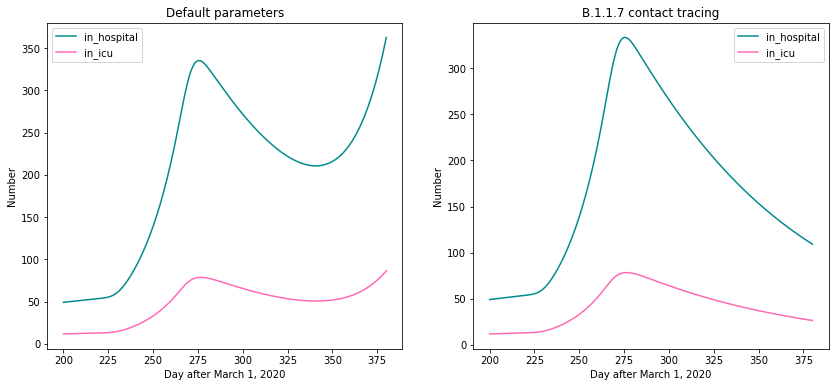

In [2]:
# open the BC model including the variant, and the parameters set as above
bc_model = Model.open_file('bc_2_8_1224_v.pypm')
bc_model.desc = 'Default parameters'

# open a second model - adjust the removal time to 5.
bc_model_alt = Model.open_file('bc_2_8_1224_v.pypm')
bc_model_alt.parameters['removed_delay_mean_v'].set_value(5.)
bc_model_alt.desc = 'B.1.1.7 contact tracing'

models = [bc_model,bc_model_alt]

# run the models, calculate expectation values for all populations for 380 days (day 0 = March 1, 2020)
n_day = 380
for model in models:
    model.evolve_expectations(n_day)

# make plots:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(14)

i=1
for model in models:
    a = fig.add_subplot(1,2,i)
    i += 1
    for pop_name in ['in_hospital','in_icu']:
        pop = model.populations[pop_name]
        plt.plot(range(n_day+1)[200:],pop.history[200:],color=pop.color,label=pop_name)
    a.set_title(model.desc)
    a.set_xlabel('Day after March 1, 2020')
    a.set_ylabel('Number')
    plt.legend()

plt.show()

## Example to produce data

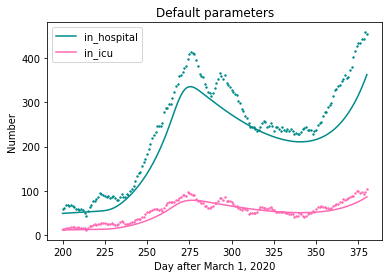

In [3]:
# set seed to get the known sample:
seed = 481423
np.random.seed(seed)
sim_model = Model.open_file('bc_2_8_1224_v.pypm')
sim_model.generate_data(n_day)

for pop_name in ['in_hospital','in_icu']:
    pop = bc_model.populations[pop_name]
    sim_pop = sim_model.populations[pop_name]
    plt.plot(range(n_day+1)[200:],pop.history[200:],color=pop.color,label=pop_name)
    plt.scatter(range(n_day+1)[200:],sim_pop.history[200:],s=2,color=pop.color)
    
plt.title(bc_model.desc)
plt.xlabel('Day after March 1, 2020')
plt.ylabel('Number')
plt.legend()

plt.show()

## Show B117 fraction of the contagious population

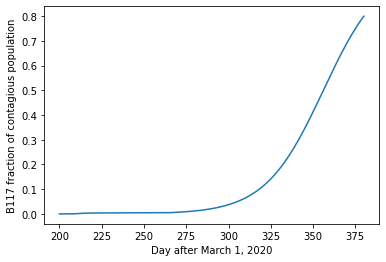

In [4]:
total_infected = np.add(bc_model.populations['contagious'].history,bc_model.populations['contagious_v'].history)
frac_variant = np.divide(bc_model.populations['contagious_v'].history,total_infected)
plt.plot(range(n_day+1)[200:],frac_variant[200:])
plt.xlabel('Day after March 1, 2020')
plt.ylabel('B117 fraction of contagious population')
plt.show()